In [2]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import theano.tensor as T
import theano
import matplotlib.pyplot as plt
f = pd.read_csv("data.csv")
import lasagne

In [3]:
f = f.ix[:,1:f.shape[1]]
d = f

In [4]:
def hours(time):
    hour = parse(str(time)).hour
    return hour
data_set = []
data_set_Y = []

for i in f:
    time = i
    if (hours(time) >= 8 and hours(time) <=12):
        data_set.append(i)
    if (hours(time) == 19):
        data_set_Y.append(i)

In [5]:
D = []
Y = []
buf = []
ind = 0
for i in data_set:
   D.append(list(f[i]))

for i in data_set_Y:
    Y.append(list(f[i]))

In [6]:
D = pd.DataFrame(D)
Y = pd.DataFrame(Y)

In [7]:
YY = []
for i in Y:
    YY.append(Y[i])

In [8]:
X = [np.array(D[i]) for i in D]

In [9]:
XX = []
for i in xrange(len(X)):
    X1 = []
    ind = 0
    while ind < len(X[i]) - 10:
        X1.append(X[i][ind:ind+5])
        ind = ind + 5
    XX.append(X1)
print(len(XX[0]))



70


In [14]:
input_X = T.matrix("XX", dtype='float64')
target_y = T.vector("Vec", dtype='float64')
input_shape = [None, 5]
rate = theano.shared(0.02)

In [15]:
input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)
dense_layer_1 = lasagne.layers.DenseLayer(input_layer, num_units= 20, nonlinearity= lasagne.nonlinearities.sigmoid,  
                                          name = "hidden_dense_layer_1")
output_layer = lasagne.layers.DenseLayer(dense_layer_1, num_units= 1, 
                                         nonlinearity= lasagne.nonlinearities.linear,name = "output_layer")

In [16]:
y_predicted = lasagne.layers.get_output(output_layer)

In [17]:
all_weights = lasagne.layers.get_all_params(output_layer)

In [18]:
loss = lasagne.objectives.squared_error(y_predicted,target_y).mean()

In [19]:
accuracy = lasagne.objectives.squared_error(y_predicted,target_y).mean()

In [20]:
updates_sgd = lasagne.updates.rmsprop(loss, all_weights,learning_rate=rate)

In [21]:
train_fun = theano.function([input_X,target_y],[loss,accuracy],updates= updates_sgd, allow_input_downcast= True)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [22]:
accuracy_fun = theano.function([input_X,target_y],[loss, accuracy], allow_input_downcast= True)



In [23]:
train_x = XX[0][:50]
train_y = YY[0][:50].values.reshape([-1,1])
check_x = XX[0][50:]
check_y = YY[0][50:].values.reshape([-1,1])
print(np.array(train_y).shape)


(50, 1)


In [37]:
import random
def shuffle(x):
    random.shuffle(x)
    return x
rand = shuffle([i for i in xrange(50)])

for i in xrange(len(train_x)):
    


In [26]:
graph = []
gr = []

for i in range(100):
    for a, b in zip(train_x, train_y):
        l, c = train_fun(a.reshape(1, -1), b)
        gr.append(l)
        rate=rate*0.99
for a, b in zip(check_x, check_y):
    
    l, c = train_fun(a.reshape(1, -1), b)
    print l
    graph.append(l)

0.00223213825902
0.00450253447154
0.00339541563268
0.00312562041868
0.000941300807284
0.000135059097283
0.00401439140681
0.0150643270902
0.00269819257331
0.00361080580639
0.00107339402397
2.32660396893e-05
0.000564436417173
0.00271066340472
0.00668008520224
0.0101978786579
0.00487613253429
0.00833279203174
0.0296432843863
0.0355223307049


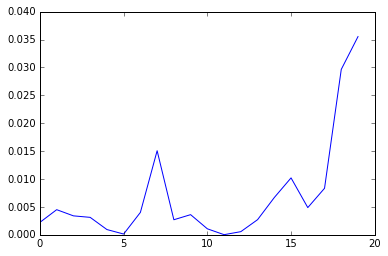

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(graph)

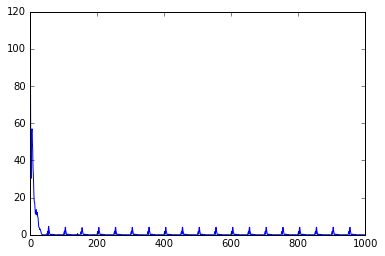

In [28]:
plt.plot(gr[:1000])